In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

from matplotlib import image



def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / np.abs(targets)) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [2]:
Bitcoin = pd.read_csv('Bitcoin.csv')
CBOE_UK = pd.read_csv('CBOE UK.csv')
China_Markets = pd.read_csv('China Markets.csv')
Euronext = pd.read_csv('Euronext.csv')
US_Markets = pd.read_csv('US Markets.csv')
Russia_Index=pd.read_csv('Russia Index.csv')
Tokyo_Index = pd.read_csv('Tokyo Index.csv')
Buenos_Aires_Index = pd.read_csv('Buenos Aires Index.csv')

In [3]:
Euronext.shape

(1282, 2)

In [4]:
df=Bitcoin.merge(US_Markets.merge(China_Markets.merge(
    Euronext.merge(CBOE_UK.merge(Russia_Index.merge(Tokyo_Index.merge(Buenos_Aires_Index)))))))
markets=df.copy()
markets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1034 non-null   object 
 1   Bitcoin Close       1034 non-null   object 
 2   S&P Close           1034 non-null   object 
 3   NASDAQ Close        1034 non-null   object 
 4   GOOG Close          1034 non-null   object 
 5   AMZN Close          1034 non-null   float64
 6   GME Close           1034 non-null   float64
 7   AMC Close           1034 non-null   float64
 8   Total US Close      1034 non-null   float64
 9   China Ind Close     1034 non-null   object 
 10  Euronext Close      1034 non-null   object 
 11  CBOE UK Close       1034 non-null   object 
 12  Russia Indx Close   1034 non-null   object 
 13  Tokyo_Index         1034 non-null   object 
 14  Buenos_Aires_Close  1034 non-null   object 
dtypes: float64(4), object(11)
memory usage: 129.2+ KB


### Rename the columns for easy tab access.

In [5]:
markets=markets.rename(columns={'Bitcoin Close':'Bitcoin_Close',
                        'S&P Close':'S&P_Close',
                        'NASDAQ Close':'NASDAQ_Close',
                        'GOOG Close':'GOOG_Close',
                        'AMZN Close':'AMZN_Close',
                        'GME Close':'GME_Close',
                        'AMC Close':'AMC_Close',
                        'Total US Close':'Total_US_Close',
                        'China Ind Close':'China_Ind_Close',
                        'Euronext Close':'Euronext_Close',
                        'CBOE UK Close':'CBOE_UK_Close',
                        'Russia Indx Close':'Russia_Index'})

### Temporarily convert Date to datetime. We will make it a pure numerical eventually.

In [6]:
markets['Date']=pd.to_datetime(markets['Date'])

In [7]:
markets.describe(include='all').T

C:\Users\GreatJag\AppData\Local\Temp\ipykernel_5760\2148836356.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  markets.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,1034,1034,2022-07-15 00:00:00,1,2017-07-18,2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin_Close,1034,1032,"9,081.76",2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P_Close,1034,1031,"2,723.06",2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NASDAQ_Close,1034,1030,"7,421.46",2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG_Close,1034,689,"1,079",6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN_Close,1034.0,NaN,NaN,NaN,NaT,NaT,113.187534,40.733372,46.93,83.605,95.915,158.065,186.57
GME_Close,1034.0,NaN,NaN,NaN,NaT,NaT,54.095406,72.792489,2.8,6.955,15.135,105.585,347.51
AMC_Close,1034.0,NaN,NaN,NaN,NaT,NaT,15.315716,10.984974,2.0,9.0,14.0,17.0,63.0
Total_US_Close,1034.0,NaN,NaN,NaN,NaT,NaT,82.167834,17.205051,58.0,69.0,74.0,97.0,118.0
China_Ind_Close,1034,1034,"20,297.72",1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create a list of numericals with commas. Then, remove the commas.

In [8]:
list_of_comma_values=['Bitcoin_Close','S&P_Close','NASDAQ_Close','GOOG_Close','China_Ind_Close','Euronext_Close','CBOE_UK_Close','Russia_Index','Tokyo_Index','Buenos_Aires_Close']

In [9]:
for columns in list_of_comma_values:
    list_=[]
    for index in markets[columns].index.tolist():
        list_.append(markets[columns][index].replace(',',''))
    markets[columns]=list_
markets.describe(include='all').T

C:\Users\GreatJag\AppData\Local\Temp\ipykernel_5760\1660654276.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  markets.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,1034,1034,2022-07-15 00:00:00,1,2017-07-18,2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin_Close,1034,1032,9081.76,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P_Close,1034,1031,2723.06,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NASDAQ_Close,1034,1030,7421.46,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG_Close,1034,689,1079,6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN_Close,1034.0,NaN,NaN,NaN,NaT,NaT,113.187534,40.733372,46.93,83.605,95.915,158.065,186.57
GME_Close,1034.0,NaN,NaN,NaN,NaT,NaT,54.095406,72.792489,2.8,6.955,15.135,105.585,347.51
AMC_Close,1034.0,NaN,NaN,NaN,NaT,NaT,15.315716,10.984974,2.0,9.0,14.0,17.0,63.0
Total_US_Close,1034.0,NaN,NaN,NaN,NaT,NaT,82.167834,17.205051,58.0,69.0,74.0,97.0,118.0
China_Ind_Close,1034,1034,20297.72,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### CBOE, Russia, Tokyo, Buenos Aires, and China have null values.

### Change the null values to np.nan.

In [10]:
(markets['Tokyo_Index']=='-').sum()

11

In [11]:
(markets['Buenos_Aires_Close']=='-').sum()

1

In [12]:
(markets['CBOE_UK_Close']=='-').sum()

4

In [13]:
(markets['Russia_Index']=='-').sum()

4

In [14]:
(markets['China_Ind_Close']=='-').sum()

1

In [15]:
list_of_missing_values=['CBOE_UK_Close',
                        'China_Ind_Close','Russia_Index','Tokyo_Index','Buenos_Aires_Close']

for columns in list_of_missing_values:
    markets[columns]=markets[columns].replace('-',np.nan)
markets.describe(include='all').T

C:\Users\GreatJag\AppData\Local\Temp\ipykernel_5760\3128816129.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  markets.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,1034,1034,2022-07-15 00:00:00,1,2017-07-18,2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin_Close,1034,1032,9081.76,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P_Close,1034,1031,2723.06,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NASDAQ_Close,1034,1030,7421.46,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG_Close,1034,689,1079,6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN_Close,1034.0,NaN,NaN,NaN,NaT,NaT,113.187534,40.733372,46.93,83.605,95.915,158.065,186.57
GME_Close,1034.0,NaN,NaN,NaN,NaT,NaT,54.095406,72.792489,2.8,6.955,15.135,105.585,347.51
AMC_Close,1034.0,NaN,NaN,NaN,NaT,NaT,15.315716,10.984974,2.0,9.0,14.0,17.0,63.0
Total_US_Close,1034.0,NaN,NaN,NaN,NaT,NaT,82.167834,17.205051,58.0,69.0,74.0,97.0,118.0
China_Ind_Close,1033,1033,20297.72,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
markets.isnull().sum()

Date                   0
Bitcoin_Close          0
S&P_Close              0
NASDAQ_Close           0
GOOG_Close             0
AMZN_Close             0
GME_Close              0
AMC_Close              0
Total_US_Close         0
China_Ind_Close        1
Euronext_Close         0
CBOE_UK_Close          4
Russia_Index           4
Tokyo_Index           11
Buenos_Aires_Close     1
dtype: int64

### Since there are only a few nan rows, remove them all.

In [17]:
list_index=[]
for index in list(range(markets.shape[0])):
    if markets.iloc[index,:].isnull().sum()>0:
        list_index.append(index)
markets.drop(list_index,axis=0,inplace=True)
markets.isnull().sum()

Date                  0
Bitcoin_Close         0
S&P_Close             0
NASDAQ_Close          0
GOOG_Close            0
AMZN_Close            0
GME_Close             0
AMC_Close             0
Total_US_Close        0
China_Ind_Close       0
Euronext_Close        0
CBOE_UK_Close         0
Russia_Index          0
Tokyo_Index           0
Buenos_Aires_Close    0
dtype: int64

In [18]:
markets=markets.reset_index().drop('index',axis=1)

In [19]:
markets.describe(include='all').T

C:\Users\GreatJag\AppData\Local\Temp\ipykernel_5760\2148836356.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  markets.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,1013,1013,2022-07-15 00:00:00,1,2017-07-18,2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin_Close,1013,1011,3419.94,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P_Close,1013,1010,2723.06,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NASDAQ_Close,1013,1009,7421.46,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG_Close,1013,683,1168,6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN_Close,1013.0,NaN,NaN,NaN,NaT,NaT,113.663129,40.636885,46.93,84.31,96.32,158.1,186.57
GME_Close,1013.0,NaN,NaN,NaN,NaT,NaT,54.4108,73.055377,2.8,6.43,15.12,108.73,347.51
AMC_Close,1013.0,NaN,NaN,NaN,NaT,NaT,15.306466,11.050266,2.0,8.0,14.0,17.0,63.0
Total_US_Close,1013.0,NaN,NaN,NaN,NaT,NaT,82.341283,17.197119,58.0,69.0,74.0,98.0,118.0
China_Ind_Close,1013,1013,20297.72,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert all to numerical.

In [20]:
dict_={}
for a,b in list(enumerate(markets['Date'].astype('str'))):
    dict_[b]=a

markets['Date']=markets['Date'].astype('str').map(dict_)

In [21]:
markets=markets.astype('float64')
markets.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,1013.0,506.000000,292.572213,0.00,253.00,506.00,759.00,1012.00
Bitcoin_Close,1013.0,18787.997542,17415.220498,2273.43,6842.43,9729.80,31792.31,67566.83
S&P_Close,1013.0,3306.556426,687.832604,2386.13,2754.88,3006.73,3886.83,4793.54
NASDAQ_Close,1013.0,9938.513317,2973.756990,6216.53,7481.99,8506.21,12850.22,16057.44
GOOG_Close,1013.0,1603.188983,637.440795,907.24,1115.00,1292.00,2095.00,3014.00
AMZN_Close,1013.0,113.663129,40.636885,46.93,84.31,96.32,158.10,186.57
GME_Close,1013.0,54.410800,73.055377,2.80,6.43,15.12,108.73,347.51
AMC_Close,1013.0,15.306466,11.050266,2.00,8.00,14.00,17.00,63.00
Total_US_Close,1013.0,82.341283,17.197119,58.00,69.00,74.00,98.00,118.00
China_Ind_Close,1013.0,26841.437927,2549.861817,19380.34,25120.09,26979.39,28621.42,33154.12


## Univariate Analysis

In [22]:
def histobox(data, feature, figsize=(15, 5), kde=False, bins=100):
    
#bins= number of sections of a histogram 

    HBP, (box,hist) = plt.subplots(
        nrows=2,
        sharex=True, #sharex and sharey just means the x and y axis won't show up for both, only one (usually bottom or left)
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    sns.boxplot(
        data=data, x=feature, ax=box, showmeans=True, color="orange"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=hist, bins=bins, palette="mako" #i like mako
    )
    hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

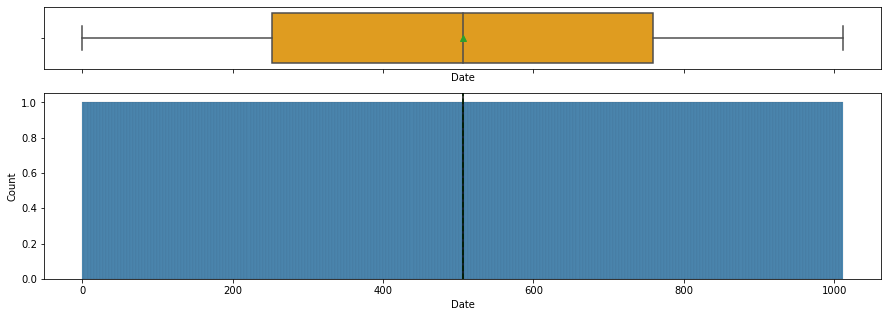

In [23]:
histobox(markets,'Date',bins=1013)

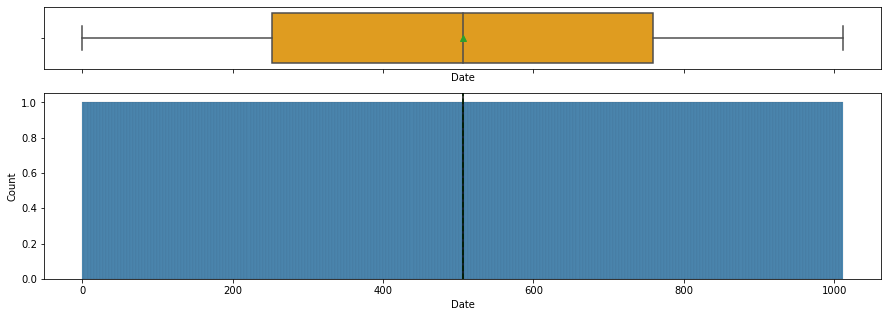

In [24]:
histobox(markets,'Date',bins=1013)

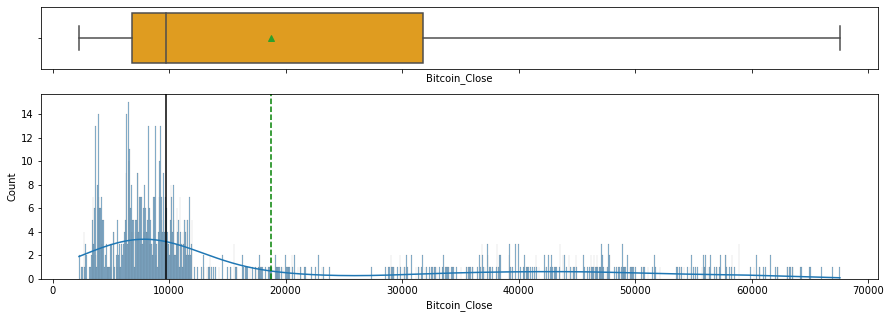

In [25]:
histobox(markets,'Bitcoin_Close',bins=1013,kde=True)

## Bitcoin is our dependent variable, so it's a bad idea to transform it.

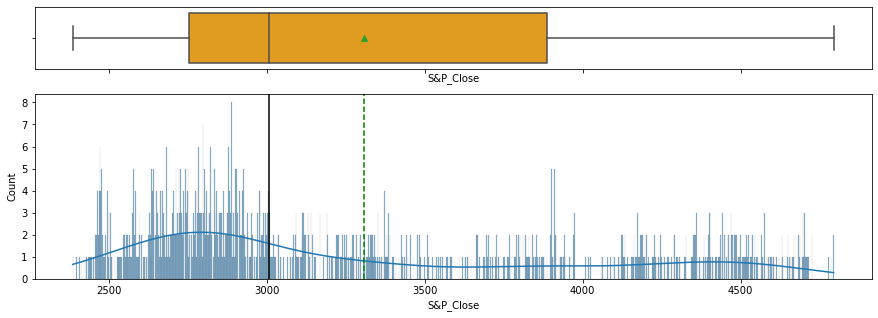

In [26]:
histobox(markets,'S&P_Close',bins=1013,kde=True)

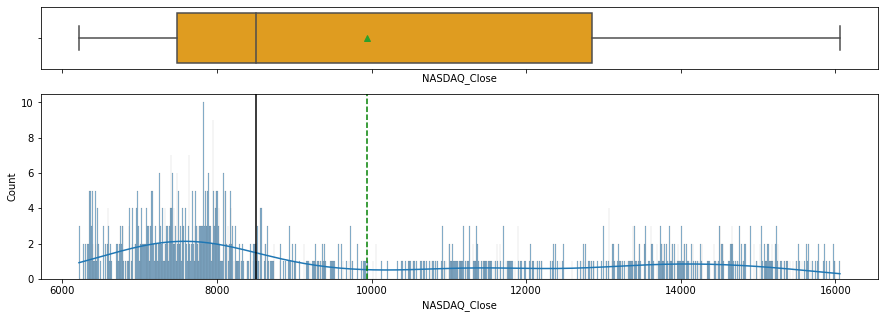

In [27]:
histobox(markets,'NASDAQ_Close',bins=1013,kde=True)

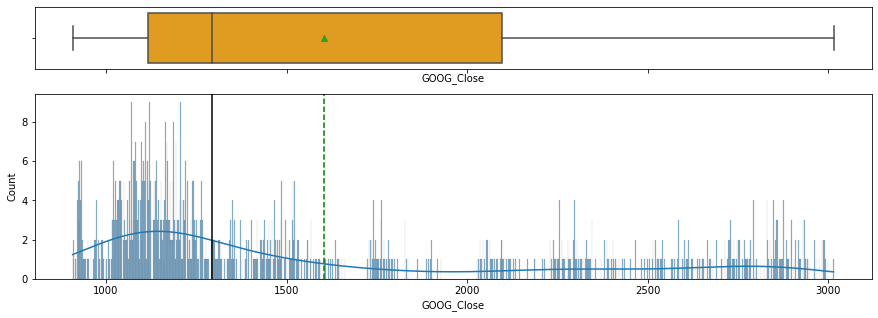

In [28]:
histobox(markets,'GOOG_Close',bins=1013,kde=True)

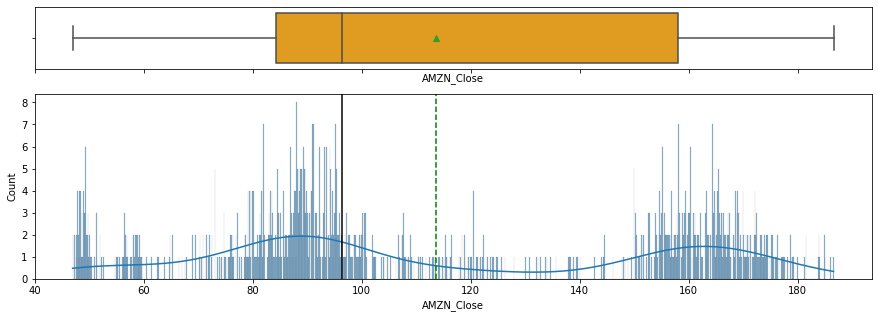

In [29]:
histobox(markets,'AMZN_Close',bins=1013,kde=True)

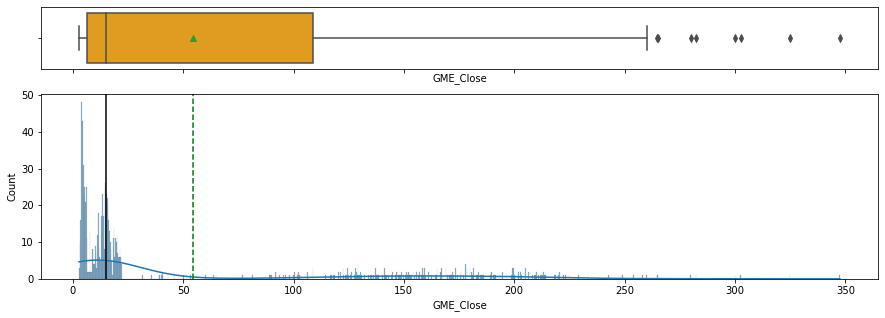

In [30]:
histobox(markets,'GME_Close',bins=1013,kde=True)

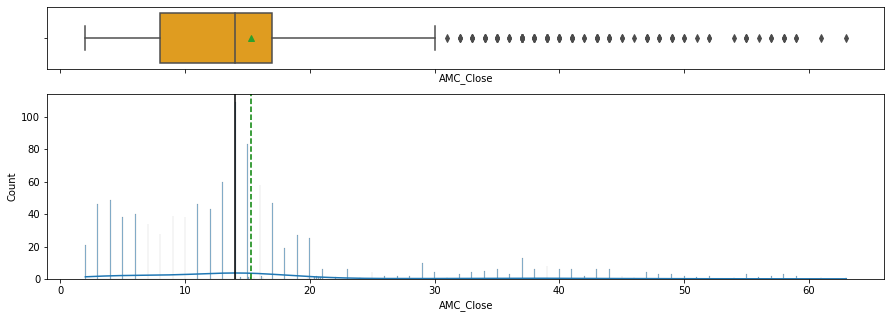

In [31]:
histobox(markets,'AMC_Close',bins=1013,kde=True)

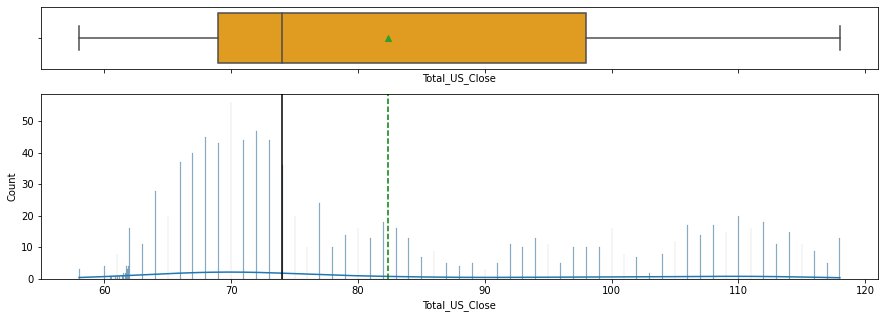

In [32]:
histobox(markets,'Total_US_Close',bins=1013,kde=True)

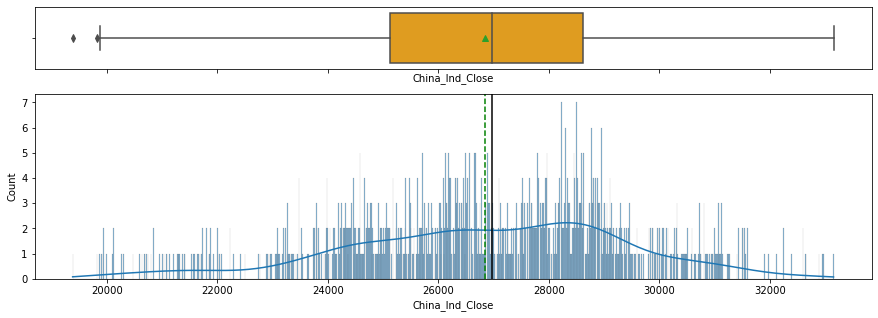

In [33]:
histobox(markets,'China_Ind_Close',bins=1013,kde=True)

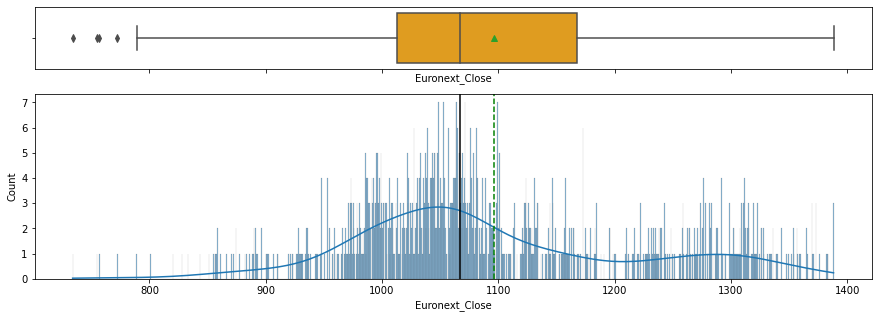

In [34]:
histobox(markets,'Euronext_Close',bins=1013,kde=True)

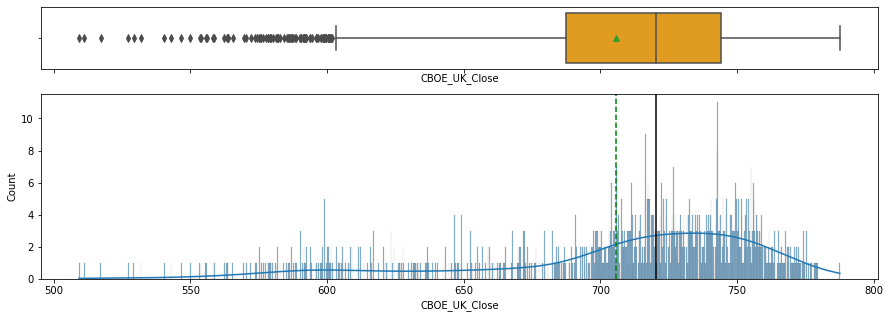

In [35]:
histobox(markets,'CBOE_UK_Close',bins=1013,kde=True)

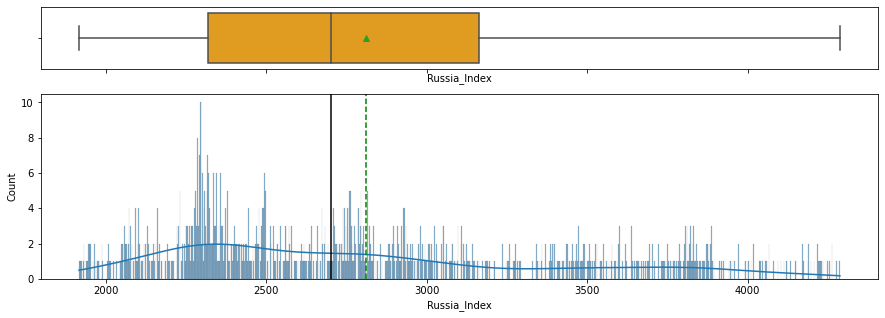

In [36]:
histobox(markets,'Russia_Index',bins=1013,kde=True)

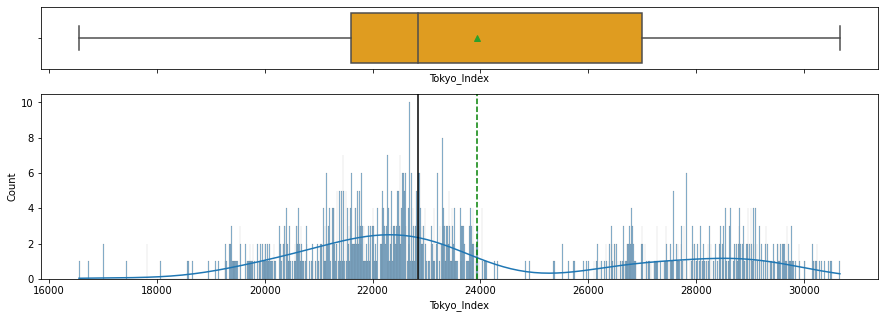

In [37]:
histobox(markets,'Tokyo_Index',bins=1013,kde=True)

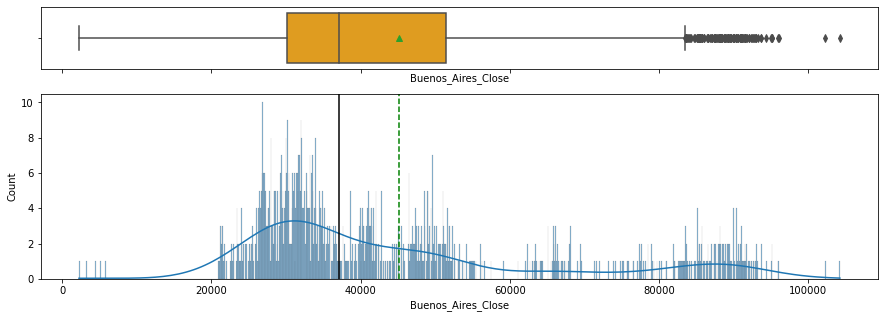

In [38]:
histobox(markets,'Buenos_Aires_Close',bins=1013,kde=True)

### Very possible that these will end up being targets for data transformation.
---
### Bivariate Analysis

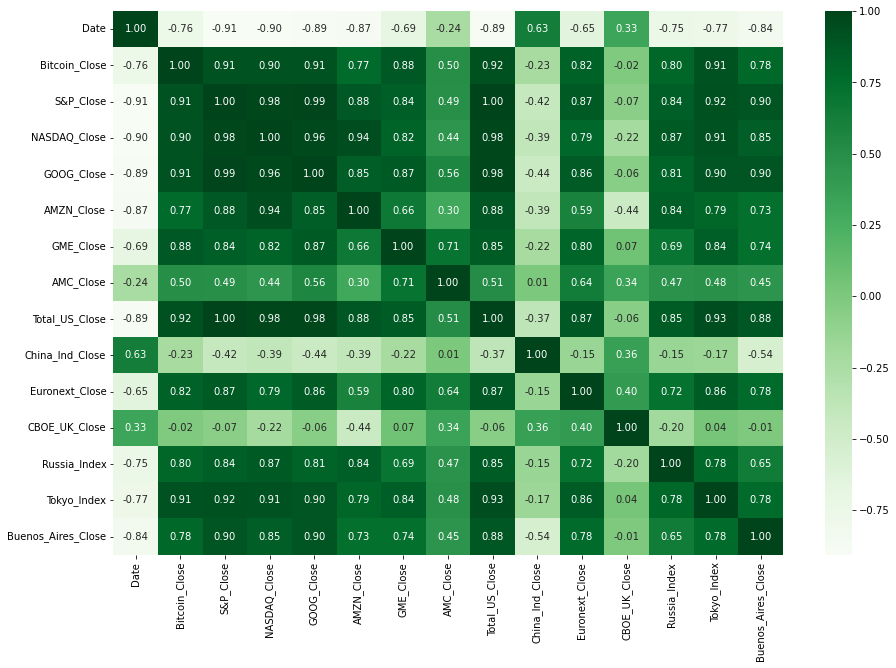

In [39]:
sns.heatmap(markets.corr(),fmt='.2f',annot=True,cmap='Greens')
plt.gcf().set_size_inches(15,10)

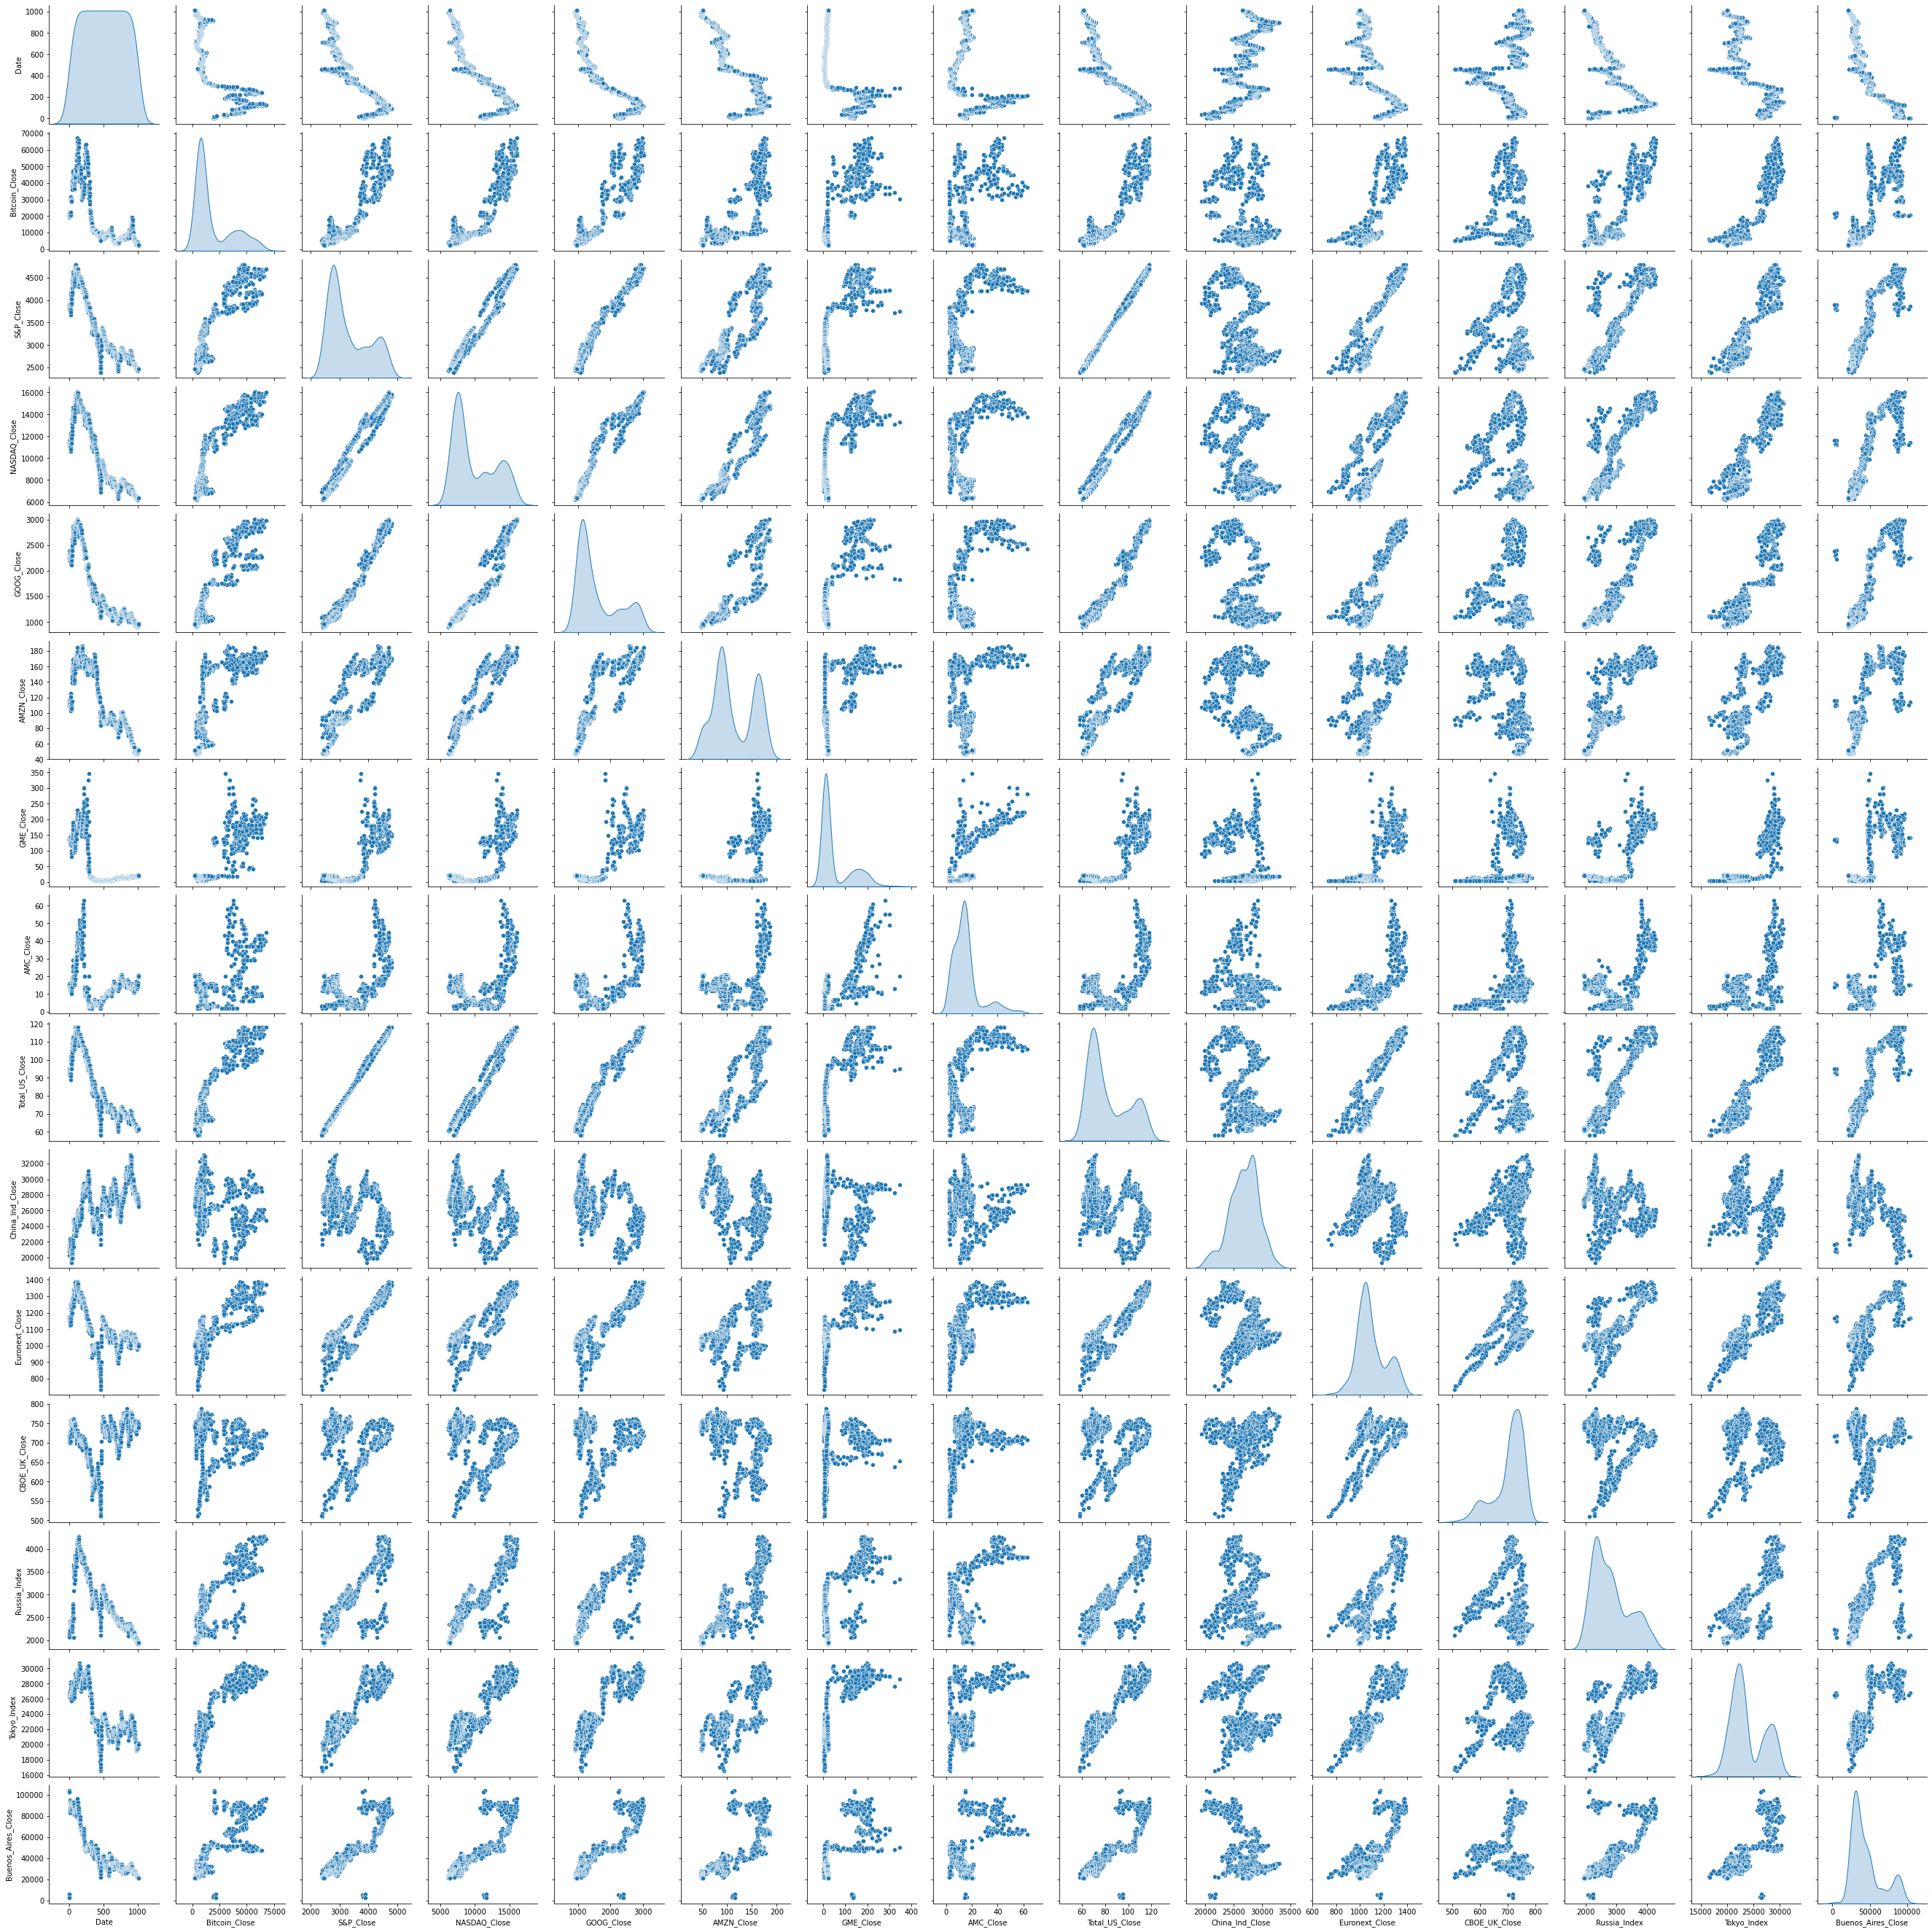

In [40]:
sns.pairplot(markets,diag_kind='kde');

### S&P500, NASDAQ, Amazon, and Google are all highly correlated with Total US Market Index. However, Amazon and Google are not as highly correlated.

### Drop S&P500 and Nasdaq.

In [41]:
markets.drop(['S&P_Close','NASDAQ_Close'],axis=1,inplace=True)

# Preprocessing

In [42]:
markets.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,1013.0,506.000000,292.572213,0.00,253.00,506.00,759.00,1012.00
Bitcoin_Close,1013.0,18787.997542,17415.220498,2273.43,6842.43,9729.80,31792.31,67566.83
GOOG_Close,1013.0,1603.188983,637.440795,907.24,1115.00,1292.00,2095.00,3014.00
AMZN_Close,1013.0,113.663129,40.636885,46.93,84.31,96.32,158.10,186.57
GME_Close,1013.0,54.410800,73.055377,2.80,6.43,15.12,108.73,347.51
AMC_Close,1013.0,15.306466,11.050266,2.00,8.00,14.00,17.00,63.00
Total_US_Close,1013.0,82.341283,17.197119,58.00,69.00,74.00,98.00,118.00
China_Ind_Close,1013.0,26841.437927,2549.861817,19380.34,25120.09,26979.39,28621.42,33154.12
Euronext_Close,1013.0,1096.106446,123.296613,733.93,1013.02,1066.60,1167.74,1388.09
CBOE_UK_Close,1013.0,705.757759,54.611231,509.20,687.28,720.40,744.16,787.68


# Create your X-y split.

In [43]:
X = markets.drop(['Bitcoin_Close'] , axis=1)
y = markets['Bitcoin_Close']

# If you still have categoricals:::

X=pd.get_dummies(X,drop_first=True)
    # remember, you only drop_first in linear and Logit, you need all the columns for the Gini Importances!

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=1
)

# then we split the temporary set into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=1
)

### Standardize the variables.

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() #or if you wanna do MinMax, use that instead

In [45]:
scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)

array([[ 0.33114237, -0.71310496, -0.33797445, ..., -0.18109678,
        -0.77003168, -0.16168464],
       [-0.92335892,  1.06485762,  1.26131195, ...,  1.13821956,
         1.83679877,  0.27402546],
       [-1.63622316,  1.14538128,  0.62030544, ..., -0.66528355,
         0.78159789,  2.27786065],
       ...,
       [-1.0072253 ,  1.1502127 ,  1.20267725, ...,  1.45267531,
         1.41904567,  0.57282317],
       [-1.64321203,  1.16631744,  0.03892744, ..., -0.71765932,
         0.97626115,  2.10080082],
       [ 1.06497321, -0.76141916, -0.70096302, ..., -0.8803678 ,
        -0.50645549, -0.93571472]])

In [46]:
y_train=(scaler.fit_transform(pd.DataFrame(y_train)))
y_val=(scaler.transform(pd.DataFrame(y_val)))
y_test=(scaler.transform(pd.DataFrame(y_test)))

y_train=pd.DataFrame(y_train).iloc[:,0]
y_val=pd.DataFrame(y_val).iloc[:,0]
y_test=pd.DataFrame(y_test).iloc[:,0]

# Start with a simple Linear Regression.

In [47]:
regression = LinearRegression()
regression.fit(X_train,y_train)

print(f"Linear Model mean of coefficients: {(regression.coef_).mean()} \n\n\n")

for idx, col_name in enumerate(X_train.iloc[:,0:5]):
    print(f"The coefficient for {col_name} is {regression.coef_[idx]}")

Linear Model mean of coefficients: 0.0006904246033668948 



The coefficient for Date is 0.001805158207826354
The coefficient for GOOG_Close is 0.0012409010776505878
The coefficient for AMZN_Close is -0.007217436903256298
The coefficient for GME_Close is 0.005524500613613478
The coefficient for AMC_Close is -0.03146087321094456


In [48]:
model_performance_regression(regression,X_train,y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.263405,0.197276,0.930618,0.928929,54.303807


In [49]:
model_performance_regression(regression,X_test,y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.260113,0.193551,0.924616,0.919854,53.087429


# No crazy coefficients here. Let's move on to Polynomial Features.

In [50]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
    # degree - Only include up to THIS many features at once. Default is 2.
        # ie: if degree = 3, you can get something like A^2B or ABC.

    # interaction_only - no squares/cubes/etc allowed. Only polynomials that
    # actually have features interacting.
        # ie: if interaction_only is True, A^2 is not allowed, but AB is.

In [51]:
X_poly = pd.DataFrame(poly.fit_transform(X))
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.3,random_state=1)
X_train.shape

(709, 79)

### Redo Standardization on X and y sets.

In [52]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.        ,  1.44861795, -0.83162436, ..., -0.8674818 ,
        -0.92888243, -0.79369239],
       [ 0.        ,  0.40244825, -0.79195182, ..., -0.43958761,
        -0.3068281 , -0.44038292],
       [ 0.        , -0.73090225,  0.24270809, ...,  1.27116873,
         0.49217905,  0.48531893],
       ...,
       [ 0.        ,  1.74503269, -1.06410546, ..., -1.32375199,
        -1.12603448, -1.08919365],
       [ 0.        , -0.58443849, -0.13338761, ..., -0.25885334,
        -0.21995318, -0.17944556],
       [ 0.        , -0.10668767, -0.44918105, ..., -0.21936619,
        -0.38809177, -0.55416924]])

In [53]:
y_train=(scaler.fit_transform(pd.DataFrame(y_train)))
y_test=(scaler.transform(pd.DataFrame(y_test)))

y_train=pd.DataFrame(y_train).iloc[:,0]
y_test=pd.DataFrame(y_test).iloc[:,0]

In [54]:
regression_poly = LinearRegression()
regression_poly.fit(X_train,y_train)

print(f"Linear Model mean of coefficients: {(regression_poly.coef_).mean()}")

Linear Model mean of coefficients: -0.002393274094452049


In [55]:
print(f"Linear Model mean of coefficients: {(regression.coef_).mean()} \n\n\n")

for idx, col_name in enumerate(X_train.iloc[:,0:5]):
    print(f"The coefficient for {col_name} is {regression.coef_[idx]}")

Linear Model mean of coefficients: 0.0006904246033668948 



The coefficient for 0 is 0.001805158207826354
The coefficient for 1 is 0.0012409010776505878
The coefficient for 2 is -0.007217436903256298
The coefficient for 3 is 0.005524500613613478
The coefficient for 4 is -0.03146087321094456


In [56]:
model_performance_regression(regression_poly,X_train,y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.115189,0.083602,0.986731,0.985065,24.500319


In [57]:
PolyRegressionMetrics=model_performance_regression(regression_poly,X_test,y_test)
model_performance_regression(regression_poly,X_test,y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.132987,0.098311,0.982408,0.976203,42.558925


In [58]:
X.shape

(1013, 12)

In [59]:
X_train.shape

(709, 79)

## We have many more columns now, and will most likely need Ridge/Lasso.

In [60]:
regression_poly.coef_

array([-2.66402361e-09,  3.12981062e-03,  2.41502005e-03,  2.75739991e-02,
        8.59150220e-04,  4.46702645e-02, -2.77868703e-01, -2.48890198e-05,
        5.63815525e-03,  2.45627889e-03,  3.82694203e-03, -5.45867619e-04,
        1.41571819e-04,  2.24336432e-06, -1.89087332e-05, -1.08902879e-05,
        4.12351748e-06,  1.42208509e-04,  2.49254218e-07, -1.97675864e-05,
        5.72318659e-06, -2.71520717e-06,  1.64974889e-07, -3.20606538e-08,
       -3.25052625e-05, -6.31286711e-06, -4.81352532e-06,  2.41964149e-04,
        3.93663112e-07, -3.32920084e-06, -2.26293085e-05, -1.94761473e-06,
       -3.20860592e-07,  5.60058291e-08,  1.94713036e-04, -7.41302277e-04,
       -4.11660534e-04, -1.96723274e-06,  1.43870472e-04,  5.89469526e-05,
        6.03808299e-06, -4.06820188e-06,  1.03941408e-07, -1.12243274e-05,
       -9.62491719e-04, -2.70567854e-06,  8.50737825e-05,  1.30284792e-05,
        5.57968459e-06,  1.99407530e-06, -4.65386044e-07,  2.46453869e-04,
        6.08692703e-06,  

In [61]:
for idx, col_name in enumerate(X_train):
    print(f"The coefficient for {col_name} is {regression_poly.coef_[idx]}")

The coefficient for 0 is -2.664023610250301e-09
The coefficient for 1 is 0.0031298106229823855
The coefficient for 2 is 0.002415020053397346
The coefficient for 3 is 0.027573999081868736
The coefficient for 4 is 0.0008591502195953623
The coefficient for 5 is 0.04467026451650934
The coefficient for 6 is -0.27786870345961007
The coefficient for 7 is -2.488901975545411e-05
The coefficient for 8 is 0.005638155248772593
The coefficient for 9 is 0.002456278885659834
The coefficient for 10 is 0.0038269420267274157
The coefficient for 11 is -0.0005458676185268832
The coefficient for 12 is 0.00014157181900888646
The coefficient for 13 is 2.2433643186263452e-06
The coefficient for 14 is -1.8908733177275445e-05
The coefficient for 15 is -1.0890287921827099e-05
The coefficient for 16 is 4.123517477202127e-06
The coefficient for 17 is 0.00014220850863499524
The coefficient for 18 is 2.4925421804322667e-07
The coefficient for 19 is -1.976758642913308e-05
The coefficient for 20 is 5.723186586218277e-

### Never mind! all my coefficients are below 1!
## Let's move on to standard regression.
# 1) Decision Tree

In [62]:
X = markets.drop(['Bitcoin_Close'] , axis=1)
y = markets['Bitcoin_Close']

# If you still have categoricals:::

X=pd.get_dummies(X,drop_first=False)
    # remember, you only drop_first in linear and Logit, you need all the columns for the Gini Importances!

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0
)

# then we split the temporary set into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0
)


In [63]:
scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)

y_train=(scaler.fit_transform(pd.DataFrame(y_train)))
y_val=(scaler.transform(pd.DataFrame(y_val)))
y_test=(scaler.transform(pd.DataFrame(y_test)))

y_train=pd.DataFrame(y_train).iloc[:,0]
y_val=pd.DataFrame(y_val).iloc[:,0]
y_test=pd.DataFrame(y_test).iloc[:,0]

In [64]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

dtree_model_val_perf=model_performance_regression(dtree, X_val,y_val)
print("Validation performance \n",dtree_model_val_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.186524  0.084123   0.964145        0.962667  34.886341


In [65]:
%%time
# Choose the type of classifier. We're using the decision tree since it's what we created at the start.
dt_estimator = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from (these are what we can adjust to look more closely at certain hyperparameter ranges)
    # make sure you don't get too narrow in range with these, the more you have the better the results.
## add from article
parameters = {'max_depth': [10,None], 
              'min_samples_leaf': [1],
              'max_leaf_nodes' : [None]+[2,5,10],
              'min_impurity_decrease': [0.00001],
              'min_samples_split' : np.arange(2,11,2),
              'max_features':[None,1,2,3,4,5,6,7,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(dt_estimator, param_distributions=parameters,n_iter=100, scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt_estimator.fit(X_train, y_train)

CPU times: total: 391 ms
Wall time: 2.9 s


DecisionTreeRegressor(max_features=6, min_impurity_decrease=1e-05,
                      min_samples_split=4, random_state=1)

In [66]:
dt_estimator_model_train_perf=model_performance_regression(dt_estimator, X_train,y_train)
print("Training performance \n",dt_estimator_model_train_perf)

dt_estimator_model_val_perf=model_performance_regression(dt_estimator, X_val,y_val)
print("Validation performance \n",dt_estimator_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.029963  0.019622   0.999102         0.99908  4.44154
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.220488  0.102652   0.949899        0.947833  41.505579


In [67]:
best_1=grid_obj.best_params_
best_1

{'min_samples_split': 4,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 1e-05,
 'max_leaf_nodes': None,
 'max_features': 6,
 'max_depth': None}

In [68]:
dt_estimator_model_train_perf=model_performance_regression(dt_estimator, X_train,y_train)
print("Training performance \n",dt_estimator_model_train_perf)

dt_estimator_model_val_perf=model_performance_regression(dt_estimator, X_val,y_val)
print("Validation performance \n",dt_estimator_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.029963  0.019622   0.999102         0.99908  4.44154
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.220488  0.102652   0.949899        0.947833  41.505579


In [69]:
dt_estimator_model_test_perf = model_performance_regression(dt_estimator, X_test,y_test)
print("Testing performance \n",dt_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.136015  0.067999   0.979599         0.97831  39.909395


# Random Forest Regression

In [70]:
rf_regressor=RandomForestRegressor(random_state=1)
rf_regressor.fit(X_train,y_train)

rf_regressor_model_train_perf = model_performance_regression(rf_regressor, X_train,y_train)
print("Training performance \n",rf_regressor_model_train_perf)

rf_regressor_model_val_perf = model_performance_regression(rf_regressor, X_val,y_val)
print("Validation performance \n",rf_regressor_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.044341  0.023644   0.998034        0.997986  5.721337
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.140885  0.069527   0.979544        0.978701  25.49779


In [71]:
%%time
# Choose the type of classifier. 
rf_regressor_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [150,200],
    "max_depth" : [None,10],
    "min_samples_leaf": [1],
    "max_features": ['sqrt','log2'],
    "max_samples": [None],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(rf_regressor_tuned, param_distributions=parameters,
                              scoring=acc_scorer,cv=100,n_iter=8, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_regressor_tuned.fit(X_train, y_train)

CPU times: total: 1.64 s
Wall time: 15.7 s


RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)

In [72]:
rf_regressor_tuned_model_train_perf = model_performance_regression(rf_regressor_tuned, X_train,y_train)
print("Training performance \n",rf_regressor_tuned_model_train_perf)

rf_regressor_tuned_model_val_perf = model_performance_regression(rf_regressor_tuned, X_val,y_val)
print("Validation performance \n",rf_regressor_tuned_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.036285  0.021412   0.998683        0.998651  5.819319
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.111313  0.061971   0.987231        0.986704  30.063227


In [73]:
best_1=grid_obj.best_params_
best_1 #0.986637 train 0.998527 

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': None}

In [74]:
best_2=grid_obj.best_params_#BEST
best_2 #0.987231 train 0.998683 

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': None}

In [75]:
best_3=grid_obj.best_params_
best_3 #0.986465 train 0.998625

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': None}

In [76]:
rf_regressor_tuned_model_test_perf = model_performance_regression(rf_regressor_tuned, X_test,y_test)
print("Testing performance \n",rf_regressor_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.106587  0.058039   0.987472         0.98668  25.48883


# Adaboost (based on Random Forest)

In [77]:
ab_regressor=AdaBoostRegressor(random_state=1,base_estimator=RandomForestRegressor(
                random_state=1,
                n_estimators= 200,
                min_samples_leaf= 1,
                max_samples= None,
                max_features= 'sqrt',
                max_depth= None))
ab_regressor.fit(X_train,y_train)

ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

ab_regressor_model_val_perf = model_performance_regression(ab_regressor,X_val,y_val)
print("Validation performance \n",ab_regressor_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.020181  0.018162   0.999593        0.999583  3.685637
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.100482  0.060196   0.989595        0.989166  25.182526


In [78]:
%%time
# Choose the type of classifier. 
ab_regressor_tuned = AdaBoostRegressor(random_state=1,base_estimator=RandomForestRegressor(
                random_state=1,
                n_estimators= 200,
                min_samples_leaf= 1,
                max_samples= None,
                max_features= 'sqrt',
                max_depth= None))

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,80,100],
    "learning_rate": [0.1,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(ab_regressor_tuned, param_distributions=parameters,
                              scoring=acc_scorer,cv=5,n_iter=6, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_regressor_tuned.fit(X_train, y_train)

CPU times: total: 20 s
Wall time: 1min 13s


AdaBoostRegressor(base_estimator=RandomForestRegressor(max_features='sqrt',
                                                       n_estimators=200,
                                                       random_state=1),
                  learning_rate=1, random_state=1)

In [79]:
ab_regressor_tuned_model_train_perf = model_performance_regression(ab_regressor_tuned, X_train,y_train)
print("Training performance \n",ab_regressor_tuned_model_train_perf)

ab_regressor_tuned_model_val_perf = model_performance_regression(ab_regressor_tuned,X_val,y_val)
print("Validation performance \n",ab_regressor_tuned_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.020181  0.018162   0.999593        0.999583  3.685637
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.100482  0.060196   0.989595        0.989166  25.182526


In [80]:
ab_regressor_tuned_model_test_perf = model_performance_regression(ab_regressor_tuned, X_test,y_test)
print("Testing performance \n",ab_regressor_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.104534  0.058851    0.98795        0.987189  19.769371


# GradientBoost

In [81]:
gb_regressor=GradientBoostingRegressor(random_state=1)
gb_regressor.fit(X_train,y_train)

gb_regressor_model_train_perf = model_performance_regression(gb_regressor, X_train,y_train)
print("Training performance \n",gb_regressor_model_train_perf)

gb_regressor_model_val_perf = model_performance_regression(gb_regressor, X_val,y_val)
print("Validation performance \n",gb_regressor_model_val_perf)

Training performance 
        RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.049149  0.03609   0.997584        0.997526  6.442552
Validation performance 
        RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  0.123468  0.07281    0.98429        0.983642  30.820854


In [82]:
%%time
# Choose the type of classifier. 
gb_regressor_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [300],
    "subsample":[0.2,0.4,0.6,0.8,0.9],
    "max_features": [0.3],
    "learning_rate" : [0.1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(gb_regressor_tuned, param_distributions=parameters,
                              scoring=acc_scorer,cv=100, n_iter=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_regressor_tuned.fit(X_train, y_train)

CPU times: total: 781 ms
Wall time: 4.82 s


GradientBoostingRegressor(max_features=0.3, n_estimators=300, random_state=1,
                          subsample=0.9)

In [83]:
gb_regressor_tuned_model_train_perf = model_performance_regression(gb_regressor_tuned, X_train,y_train)
print("Training performance \n",gb_regressor_tuned_model_train_perf)

gb_regressor_tuned_model_val_perf = model_performance_regression(gb_regressor_tuned,X_val,y_val)
print("Validation performance \n",gb_regressor_tuned_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.020768  0.016346   0.999569        0.999558  3.188875
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.104249  0.061428     0.9888        0.988338  20.25179


In [84]:
grid_obj.best_params_ #0.998381, 0.986375

{'subsample': 0.9,
 'n_estimators': 300,
 'max_features': 0.3,
 'learning_rate': 0.1}

In [85]:
grid_obj.best_params_ #0.999569, 0.9888
#BEST

{'subsample': 0.9,
 'n_estimators': 300,
 'max_features': 0.3,
 'learning_rate': 0.1}

In [86]:
grid_obj.best_params_ #0.999437, 0.987886

{'subsample': 0.9,
 'n_estimators': 300,
 'max_features': 0.3,
 'learning_rate': 0.1}

In [87]:
gb_regressor_tuned_model_test_perf = model_performance_regression(gb_regressor_tuned, X_test,y_test)
print("Testing performance \n",gb_regressor_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.116609  0.065031   0.985005        0.984058  21.898743


# XGBoost

In [88]:
xgb_regressor=XGBRegressor(random_state=1)
xgb_regressor.fit(X_train,y_train)

xgb_regressor_model_train_perf = model_performance_regression(xgb_regressor, X_train, y_train)
print("Training performance \n",xgb_regressor_model_train_perf)

xgb_regressor_model_val_perf = model_performance_regression(xgb_regressor,X_val,y_val)
print("Validation performance \n",xgb_regressor_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.001453  0.001056   0.999998        0.999998  0.209292
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.136024  0.067034   0.980932        0.980145  28.832264


In [89]:
%%time
# Choose the type of classifier. 
xgb_regressor_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "eval_metric" : ['rmse'], #rmse for Regression, logloss for Classification
    "n_estimators": [90],
    "scale_pos_weight":[1],
    "subsample":[0.7,0.9],
    "learning_rate":[0.1],
    "gamma":[0], #higher gamma = better protection from overfitting
    "colsample_bytree":[0.5],
    "colsample_bylevel":[0.5,0.7],
    "colsample_bynode": [0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_regressor_tuned, param_distributions=parameters,
                              scoring=acc_scorer,cv=250, n_iter=4,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_regressor_tuned.fit(X_train, y_train)

CPU times: total: 2.8 s
Wall time: 3.95 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.9, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [90]:
xgb_regressor_tuned_model_train_perf = model_performance_regression(xgb_regressor_tuned, X_train, y_train)
print("Training performance \n",xgb_regressor_tuned_model_train_perf)

xgb_regressor_tuned_model_val_perf = model_performance_regression(xgb_regressor_tuned,X_val,y_val)
print("Validation performance \n",xgb_regressor_tuned_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.018614  0.014158   0.999654        0.999645  2.689804
Validation performance 
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.09042  0.055158   0.991574        0.991227  21.794836


In [91]:
best_1=grid_obj.best_params_
best_1 #0.999724, 0.990127

{'subsample': 0.7,
 'scale_pos_weight': 1,
 'n_estimators': 90,
 'learning_rate': 0.1,
 'gamma': 0,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.9,
 'colsample_bylevel': 0.7}

In [92]:
grid_obj.best_params_


{'subsample': 0.7,
 'scale_pos_weight': 1,
 'n_estimators': 90,
 'learning_rate': 0.1,
 'gamma': 0,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.9,
 'colsample_bylevel': 0.7}

In [93]:
best_3=grid_obj.best_params_ #BEST
best_3 #0.999654, 0.991574 

{'subsample': 0.7,
 'scale_pos_weight': 1,
 'n_estimators': 90,
 'learning_rate': 0.1,
 'gamma': 0,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.9,
 'colsample_bylevel': 0.7}

In [94]:
xgb_regressor_tuned_model_test_perf = model_performance_regression(xgb_regressor_tuned, X_test,y_test)
print("Testing performance \n",xgb_regressor_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.102182  0.061154   0.988486        0.987759  22.333358


# LogReg
#### We need to temporarily change y to an integer. LogisticRegression can only do regression on integer values.

In [95]:
y_inttemp=(y).astype('int64')

In [96]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_inttemp, test_size=0.5, random_state=0
)

# then we split the temporary set into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0
)


scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)

array([[-0.83731463,  0.67681406,  0.86605723, ...,  0.94405852,
         1.55491229,  0.11906654],
       [-0.66658971,  0.33747753,  1.12218522, ...,  0.56122222,
         0.8994772 ,  0.46533736],
       [-1.60899127,  1.00392224, -0.16114825, ..., -0.84824252,
         0.57167312,  1.89720105],
       ...,
       [-0.82707114,  0.72725598,  1.07247778, ...,  0.92547819,
         1.78157352,  0.17508261],
       [-1.31875891,  2.10753022,  1.59893589, ...,  2.23126794,
         1.66473662,  2.31497093],
       [ 1.52551825, -0.93732725, -1.55883333, ..., -1.17990142,
        -0.78376037, -0.89913166]])

In [97]:
%%time
Log = LogisticRegression(random_state=1,max_iter=500,solver='liblinear',penalty='l2',C=0.0013)
    #only increase max_iter if warning is thrown)
    #Check shift-tab for optimal Penalty and Solver
Log.fit(X_train, y_train)

Log_model_train_perf = model_performance_regression(Log, X_train, y_train)
print("Training performance \n",Log_model_train_perf)

Log_model_val_perf = model_performance_regression(Log,X_val,y_val)
print("Validation performance \n",Log_model_val_perf)

Training performance 
          RMSE         MAE  R-squared  Adj. R-squared     MAPE
0  618.294948  173.353755   0.998773        0.998743  1.59971
Validation performance 
           RMSE          MAE  R-squared  Adj. R-squared     MAPE
0  2232.972279  1117.644737   0.983508        0.982828  6.76716
CPU times: total: 1.7 s
Wall time: 689 ms


In [98]:
Log_tuned_model_test_perf = model_performance_regression(Log, X_test,y_test)
print("Testing performance \n",Log_tuned_model_test_perf)

Testing performance 
           RMSE          MAE  R-squared  Adj. R-squared      MAPE
0  2258.677366  1062.004926   0.981944        0.980803  5.882098


## Let's find out what our best model is:::

In [99]:
PolyRegressionMetrics=PolyRegressionMetrics.rename(index={0:'PolyRegression'})
dt_estimator_model_test_perf=dt_estimator_model_test_perf.rename(index={0:'Dtree'})
rf_regressor_tuned_model_test_perf=rf_regressor_tuned_model_test_perf.rename(index={0:'Rforest'})
ab_regressor_tuned_model_test_perf=ab_regressor_tuned_model_test_perf.rename(index={0:'Adaboost/Rforest'})
gb_regressor_tuned_model_test_perf=gb_regressor_tuned_model_test_perf.rename(index={0:'Gradientboost'})
xgb_regressor_tuned_model_test_perf=xgb_regressor_tuned_model_test_perf.rename(index={0:'XGBoost'})
Log_tuned_model_test_perf=Log_tuned_model_test_perf.rename(index={0:'Log'})

In [100]:
List_of_metrics = [PolyRegressionMetrics,
                dt_estimator_model_test_perf,
                rf_regressor_tuned_model_test_perf,
                ab_regressor_tuned_model_test_perf,
                gb_regressor_tuned_model_test_perf,
                xgb_regressor_tuned_model_test_perf,
                Log_tuned_model_test_perf]

In [101]:
List_of_metrics_concat=pd.concat(List_of_metrics,axis=0)
List_of_metrics_concat.sort_values('R-squared',ascending=False)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
XGBoost,0.102182,0.061154,0.988486,0.987759,22.333358
Adaboost/Rforest,0.104534,0.058851,0.987950,0.987189,19.769371
Rforest,0.106587,0.058039,0.987472,0.986680,25.488830
Gradientboost,0.116609,0.065031,0.985005,0.984058,21.898743
PolyRegression,0.132987,0.098311,0.982408,0.976203,42.558925
Log,2258.677366,1062.004926,0.981944,0.980803,5.882098
Dtree,0.136015,0.067999,0.979599,0.978310,39.909395


# XGBoost ended up being our best model.

### Let's tune it slightly more with Bagging.

# Bagging
(also get our normal X/y back)

In [102]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0
)

# then we split the temporary set into test and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0
)

scaler.fit_transform(X_train)
scaler.transform(X_val)
scaler.transform(X_test)

y_train=(scaler.fit_transform(pd.DataFrame(y_train)))
y_val=(scaler.transform(pd.DataFrame(y_val)))
y_test=(scaler.transform(pd.DataFrame(y_test)))

y_train=pd.DataFrame(y_train).iloc[:,0]
y_val=pd.DataFrame(y_val).iloc[:,0]
y_test=pd.DataFrame(y_test).iloc[:,0]

In [103]:
bagging_regressor=BaggingRegressor(random_state=1,base_estimator=XGBRegressor(
                    random_state=1,
                    subsample= 0.7,
                    scale_pos_weight= 1,
                    n_estimators= 90,
                    learning_rate= 0.1,
                    gamma= 0,
                    eval_metric= 'rmse',
                    colsample_bytree= 0.5,
                    colsample_bynode= 0.9,
                    colsample_bylevel= 0.7))
bagging_regressor.fit(X_train,y_train)

bagging_regressor_model_train_perf = model_performance_regression(bagging_regressor, X_train, y_train)
print("Training performance \n",bagging_regressor_model_train_perf)

bagging_regressor_model_val_perf = model_performance_regression(bagging_regressor,X_val,y_val)
print("Validation performance \n",bagging_regressor_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.050021  0.029988   0.997498        0.997437  6.101528
Validation performance 
        RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  0.115081  0.06748   0.986351        0.985789  26.803708


In [104]:
%%time
# Choose the type of classifier.
bagging_regressor_tuned = BaggingRegressor(random_state=1,base_estimator=XGBRegressor(
                    random_state=1,
                    subsample= 0.7,
                    scale_pos_weight= 1,
                    n_estimators= 90,
                    learning_rate= 0.1,
                    gamma= 0,
                    eval_metric= 'rmse',
                    colsample_bytree= 0.5,
                    colsample_bynode= 0.9,
                    colsample_bylevel= 0.7))

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.1,0.2,0.4,1.0],
    "max_features": [1.0,4,10],
    "n_estimators": [10]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_regressor_tuned, parameters, scoring=acc_scorer,cv=10,n_jobs=-1) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_regressor_tuned.fit(X_train, y_train)

CPU times: total: 11.5 s
Wall time: 4.08 s


BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=0.7,
                                             colsample_bynode=0.9,
                                             colsample_bytree=0.5,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric='rmse', gamma=0,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.1, max_bin=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=90, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=1,
                                             reg_alpha=None, reg_lambda=None, ...),
                 random_state=1)

In [105]:
bagging_regressor_tuned_model_train_perf = model_performance_regression(bagging_regressor_tuned, X_train, y_train)
print("Training performance \n",bagging_regressor_tuned_model_train_perf)

bagging_regressor_tuned_model_val_perf = model_performance_regression(bagging_regressor_tuned,X_val,y_val)
print("Validation performance \n",bagging_regressor_tuned_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.050021  0.029988   0.997498        0.997437  6.101528
Validation performance 
        RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  0.115081  0.06748   0.986351        0.985789  26.803708


### Surprisingly, we do not gain performance when bagging.

In [106]:
bagging_regressor_tuned_model_test_perf = model_performance_regression(bagging_regressor_tuned, X_test,y_test)
print("Testing performance \n",bagging_regressor_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.111821  0.065311   0.986211         0.98534  26.243531


In [107]:
bagging_regressor_tuned_model_test_perf=bagging_regressor_tuned_model_test_perf.rename(index={0:'Bagging/XGBoost'})

In [108]:
List_of_metrics_concat=pd.concat((List_of_metrics_concat,bagging_regressor_tuned_model_test_perf),axis=0)
List_of_metrics_concat.sort_values('R-squared',ascending=False)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
XGBoost,0.102182,0.061154,0.988486,0.987759,22.333358
Adaboost/Rforest,0.104534,0.058851,0.987950,0.987189,19.769371
Rforest,0.106587,0.058039,0.987472,0.986680,25.488830
Bagging/XGBoost,0.111821,0.065311,0.986211,0.985340,26.243531
Gradientboost,0.116609,0.065031,0.985005,0.984058,21.898743
PolyRegression,0.132987,0.098311,0.982408,0.976203,42.558925
Log,2258.677366,1062.004926,0.981944,0.980803,5.882098
Dtree,0.136015,0.067999,0.979599,0.978310,39.909395


# Overall best model is XGBoost.
### However, all of the models have extreme variety in the top 4 feature importances.
### Let's take a few of our models and calculate which features end up having the highest relative importance.

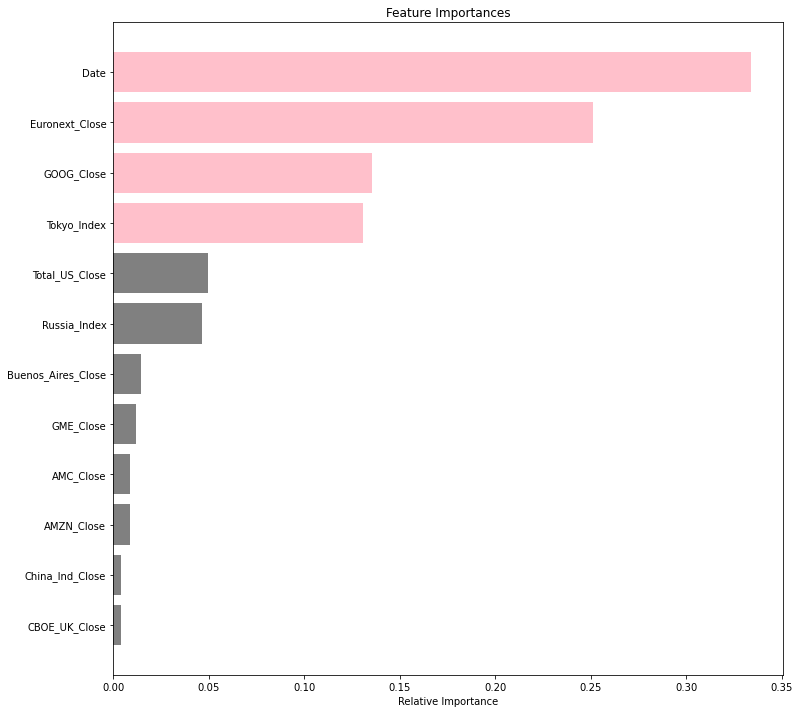

In [109]:
feature_names = X_train.columns
importances = xgb_regressor_tuned.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >7:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

#colors={}
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [110]:
list_=[]
fullist=[]
for i in indices:
    list_.append(feature_names[i])
list_=pd.DataFrame(list_).rename(columns={0:'market'})
list_['points']=importances[indices]
list_
fulllist=list_
fulllist.sort_values('market',inplace=True)
fulllist=fulllist.reset_index().drop('index',axis=1)
fulllist

,market,points
0,AMC_Close,0.008866
1,AMZN_Close,0.008856
2,Buenos_Aires_Close,0.014710
3,CBOE_UK_Close,0.003769
4,China_Ind_Close,0.004127
5,Date,0.333817
6,Euronext_Close,0.251336
7,GME_Close,0.011901
8,GOOG_Close,0.135619
9,Russia_Index,0.046621


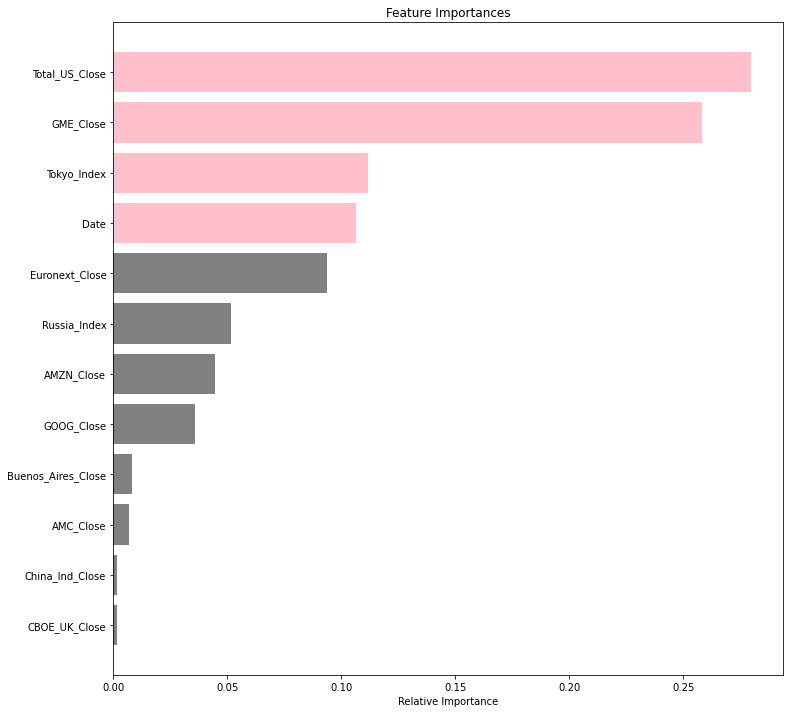

In [111]:
feature_names = X_train.columns
importances = gb_regressor_tuned.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >7:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

#colors={}
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [112]:
list_=[]
for i in indices:
    list_.append(feature_names[i])
list_=pd.DataFrame(list_).rename(columns={0:'market'})
list_['points']=importances[indices]
list_.sort_values('market',inplace=True)
fulllist['points']=fulllist['points']+list_['points']
fulllist=fulllist.reset_index().drop('index',axis=1)
fulllist

,market,points
0,AMC_Close,0.010451
1,AMZN_Close,0.010519
2,Buenos_Aires_Close,0.021561
3,CBOE_UK_Close,0.012167
4,China_Ind_Close,0.039787
5,Date,0.378380
6,Euronext_Close,0.303049
7,GME_Close,0.105439
8,GOOG_Close,0.242094
9,Russia_Index,0.158379


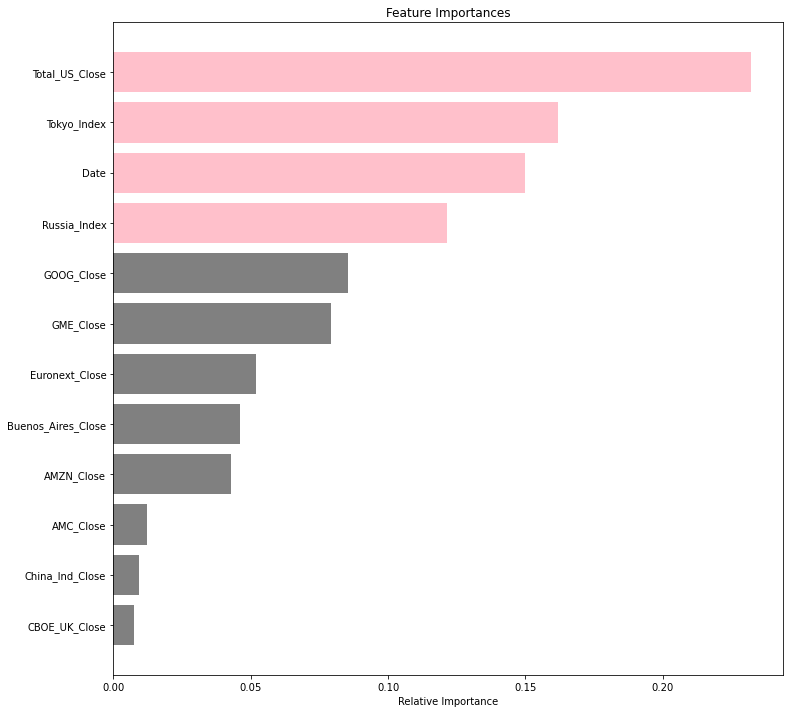

In [113]:
feature_names = X_train.columns
importances = ab_regressor_tuned.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >7:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

#colors={}
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [114]:
list_=[]
for i in indices:
    list_.append(feature_names[i])
list_=pd.DataFrame(list_).rename(columns={0:'market'})
list_['points']=importances[indices]
list_.sort_values('market',inplace=True)
fulllist['points']=fulllist['points']+list_['points']
fulllist=fulllist.reset_index().drop('index',axis=1)
fulllist

,market,points
0,AMC_Close,0.017868
1,AMZN_Close,0.019816
2,Buenos_Aires_Close,0.033815
3,CBOE_UK_Close,0.055045
4,China_Ind_Close,0.085872
5,Date,0.430361
6,Euronext_Close,0.382258
7,GME_Close,0.191009
8,GOOG_Close,0.363463
9,Russia_Index,0.308368


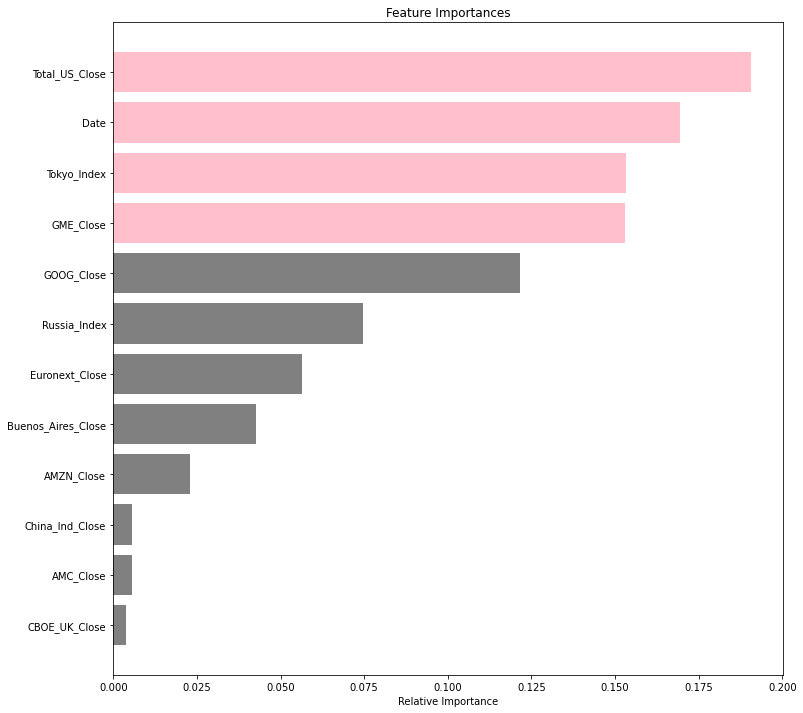

In [115]:
feature_names = X_train.columns
importances = rf_regressor_tuned.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >7:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

#colors={}
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [116]:
list_=[]
for i in indices:
    list_.append(feature_names[i])
list_=pd.DataFrame(list_).rename(columns={0:'market'})
list_['points']=importances[indices]
list_.sort_values('market',inplace=True)
fulllist['points']=fulllist['points']+list_['points']
fulllist=fulllist.reset_index().drop('index',axis=1)
fulllist

,market,points
0,AMC_Close,0.021649
1,AMZN_Close,0.025370
2,Buenos_Aires_Close,0.039497
3,CBOE_UK_Close,0.077995
4,China_Ind_Close,0.128676
5,Date,0.486918
6,Euronext_Close,0.456918
7,GME_Close,0.312630
8,GOOG_Close,0.516350
9,Russia_Index,0.461689


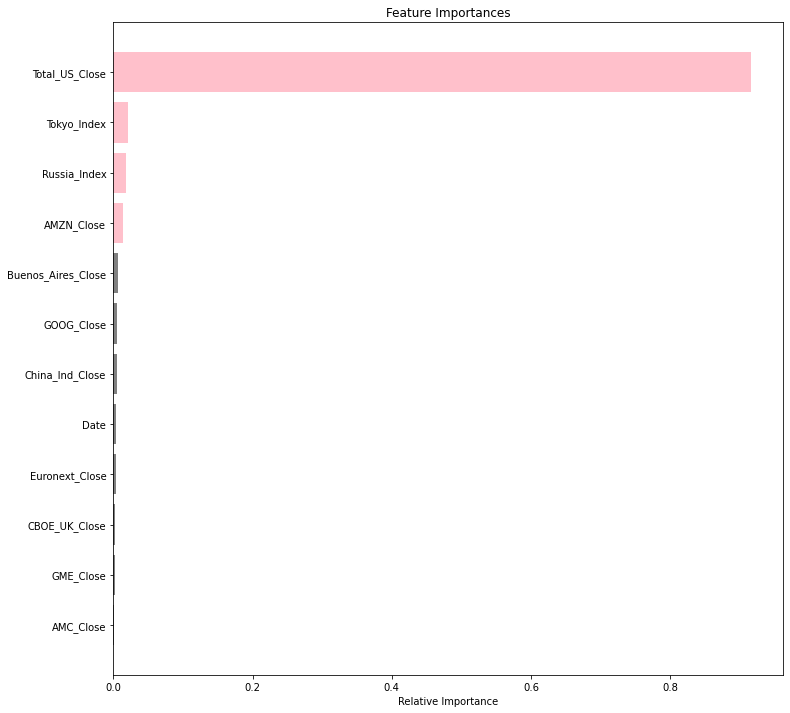

In [117]:
feature_names = X_train.columns
importances = dt_estimator.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >7:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

#colors={}
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [118]:
list_=[]
for i in indices:
    list_.append(feature_names[i])
list_=pd.DataFrame(list_).rename(columns={0:'market'})
list_['points']=importances[indices]
list_.sort_values('market',inplace=True)
fulllist['points']=fulllist['points']+list_['points']
fulllist=fulllist.reset_index().drop('index',axis=1)
fulllist

,market,points
0,AMC_Close,0.021948
1,AMZN_Close,0.027188
2,Buenos_Aires_Close,0.041927
3,CBOE_UK_Close,0.081657
4,China_Ind_Close,0.133008
5,Date,0.491944
6,Euronext_Close,0.462592
7,GME_Close,0.319972
8,GOOG_Close,0.530233
9,Russia_Index,0.479911


In [119]:
fulllist.sort_values('points',ascending=False)
fulllist['points']=fulllist['points']*0.623568131677635230102876270
fulllist.sort_values('points',ascending=False, inplace=True)
fulllist=fulllist.reset_index().drop('index',axis=1)
fulllist['points']=round(fulllist['points'],2)
fulllist

,market,points
0,Total_US_Close,1.04
1,Tokyo_Index,0.46
2,GOOG_Close,0.33
3,Date,0.31
4,Russia_Index,0.30
5,Euronext_Close,0.29
6,GME_Close,0.20
7,China_Ind_Close,0.08
8,CBOE_UK_Close,0.05
9,Buenos_Aires_Close,0.03


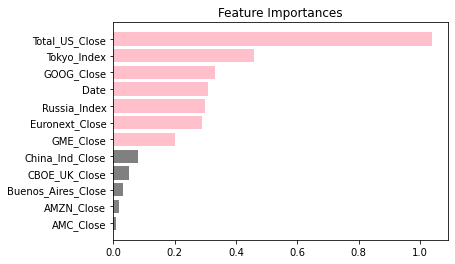

In [120]:
colorlist_=[]
for entry in range(12):
    if entry >4:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

fulllist.sort_values('points',ascending=True, inplace=True)
plt.barh(fulllist['market'],fulllist['points'],color=colorlist_)
plt.title('Feature Importances');

### Log Odds conversion:

In [121]:
odds = np.exp(Log.coef_[0])  # converting coefficients to odds
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
OddsPerc=pd.DataFrame(
    odds, X_train.columns, columns=["odds"]
)  # adding the odds to a dataframe
OddsPerc

,odds
Date,1.037870
GOOG_Close,0.991151
AMZN_Close,0.998865
GME_Close,0.997997
AMC_Close,1.001270
Total_US_Close,0.999530
China_Ind_Close,0.997325
Euronext_Close,1.003039
CBOE_UK_Close,1.004276
Russia_Index,1.005211


In [122]:
%%time
# Choose the type of classifier. 
xgb_regressor_tuned2 = XGBRegressor(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "eval_metric" : ['rmse'], #rmse for Regression, logloss for Classification
    "n_estimators": [100,150,200],
    "scale_pos_weight":[0.7],
    "subsample":[0.5,1.0],
    "learning_rate":[0.1],
    "gamma":[0], #higher gamma = better protection from overfitting
    "colsample_bytree":[0.7,0.9],
    "colsample_bylevel":[0.7,0.9],
    "colsample_bynode": [0.5,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_regressor_tuned2, param_distributions=parameters,
                              scoring=acc_scorer,cv=100, n_iter=48,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_regressor_tuned2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_regressor_tuned2.fit(X_train, y_train)

CPU times: total: 6.53 s
Wall time: 34.9 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.5, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [123]:
xgb_regressor_tuned2_model_train_perf = model_performance_regression(xgb_regressor_tuned2, X_train, y_train)
print("Training performance \n",xgb_regressor_tuned2_model_train_perf)

xgb_regressor_tuned2_model_val_perf = model_performance_regression(xgb_regressor_tuned2,X_val,y_val)
print("Validation performance \n",xgb_regressor_tuned2_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.005673  0.004222   0.999968        0.999967  0.848525
Validation performance 
       RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  0.09684  0.05637   0.990335        0.989937  26.053333


In [124]:
grid_obj.best_params_ #0.999968, 0.990335 BEST

{'subsample': 1.0,
 'scale_pos_weight': 0.7,
 'n_estimators': 200,
 'learning_rate': 0.1,
 'gamma': 0,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.7,
 'colsample_bynode': 0.5,
 'colsample_bylevel': 0.7}

In [125]:
grid_obj.best_params_ #0.999847, 0.989708 

{'subsample': 1.0,
 'scale_pos_weight': 0.7,
 'n_estimators': 200,
 'learning_rate': 0.1,
 'gamma': 0,
 'eval_metric': 'rmse',
 'colsample_bytree': 0.7,
 'colsample_bynode': 0.5,
 'colsample_bylevel': 0.7}

In [126]:
xgb_regressor_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
XGBoost,0.102182,0.061154,0.988486,0.987759,22.333358


In [127]:
xgb_regressor_tuned2_model_test_perf = model_performance_regression(xgb_regressor_tuned2, X_test,y_test)
print("Testing performance \n",xgb_regressor_tuned2_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.090832  0.050823   0.990902        0.990327  22.176755


# Made an even better XGBoost.... Check the ginis:

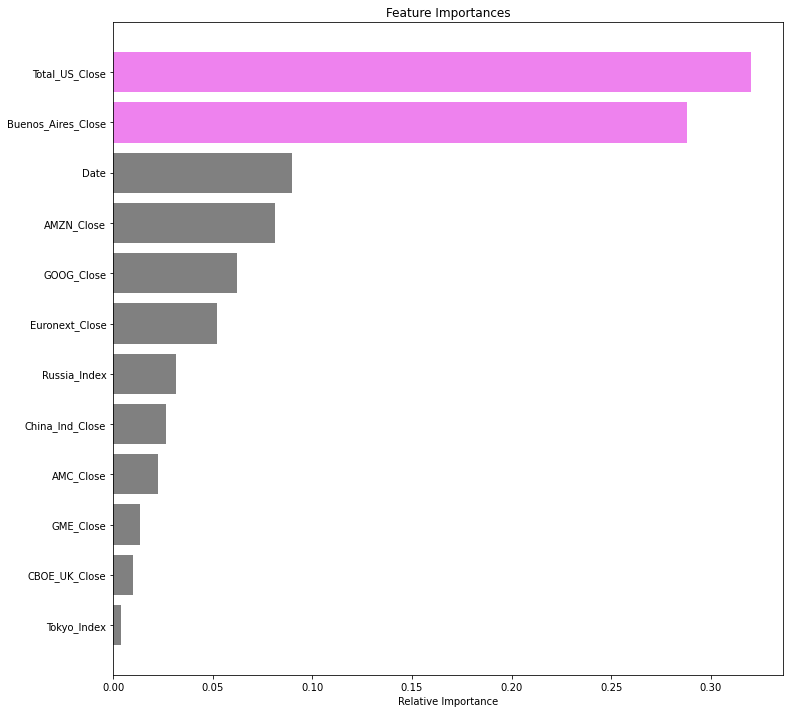

In [128]:
feature_names = X_train.columns
importances = xgb_regressor_tuned2.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >9:
        colorlist_.append('violet')
    else:
        colorlist_.append('gray')

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [129]:
%%time
# Choose the type of classifier. 
xgb_regressor_tuned3 = XGBRegressor(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "eval_metric" : ['rmse'], #rmse for Regression, logloss for Classification
    "n_estimators": [100,150,200],
    "scale_pos_weight":[0.5,0.7],
    "subsample":[0.5,0.7,1.0],
    "learning_rate":[0.1],
    "gamma":[0], #higher gamma = better protection from overfitting
    "colsample_bytree":[0.5,0.7,0.9,1.0],
    "colsample_bylevel":[0.7,0.9,1.0],
    "colsample_bynode": [0.5,0.9,1.0]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_regressor_tuned2, param_distributions=parameters,
                              scoring=acc_scorer,cv=5, n_iter=100,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_regressor_tuned3 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_regressor_tuned3.fit(X_train, y_train)

CPU times: total: 1.62 s
Wall time: 3.56 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.9, colsample_bynode=0.5, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [130]:
xgb_regressor_tuned3_model_train_perf = model_performance_regression(xgb_regressor_tuned3, X_train, y_train)
print("Training performance \n",xgb_regressor_tuned3_model_train_perf)

xgb_regressor_tuned3_model_val_perf = model_performance_regression(xgb_regressor_tuned3,X_val,y_val)
print("Validation performance \n",xgb_regressor_tuned3_model_val_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.025022  0.018687   0.999374        0.999359  3.944069
Validation performance 
        RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.104271  0.061752   0.988795        0.988333  24.464162


In [131]:
xgb_regressor_tuned3_model_test_perf = model_performance_regression(xgb_regressor_tuned3, X_test,y_test)
print("Testing performance \n",xgb_regressor_tuned3_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.111962  0.066639   0.986176        0.985303  30.98502


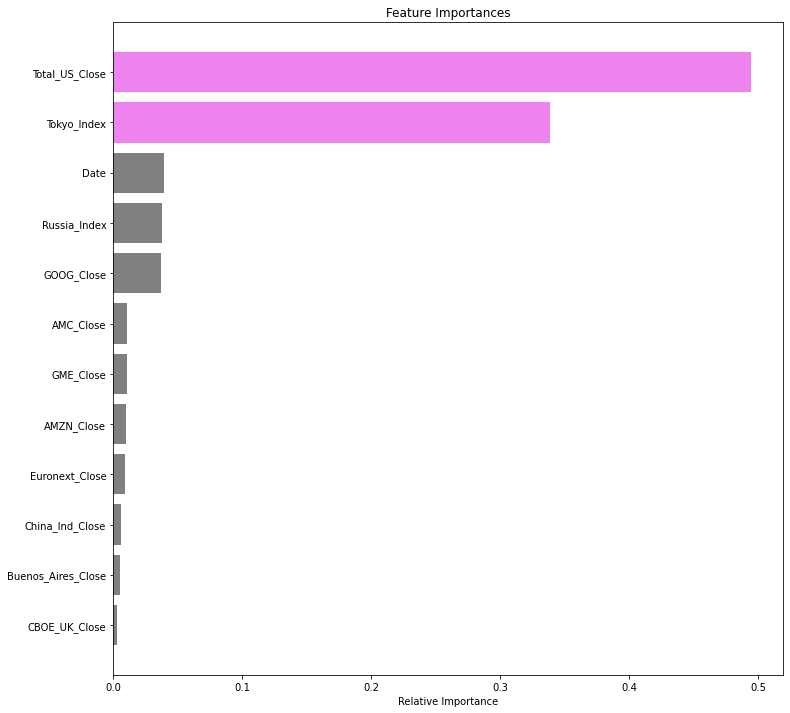

In [132]:
feature_names = X_train.columns
importances = xgb_regressor_tuned3.feature_importances_
indices = np.argsort(importances)

colorlist_=[]
for entry in range(12):
    if entry >9:
        colorlist_.append('violet')
    else:
        colorlist_.append('gray')

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=colorlist_, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

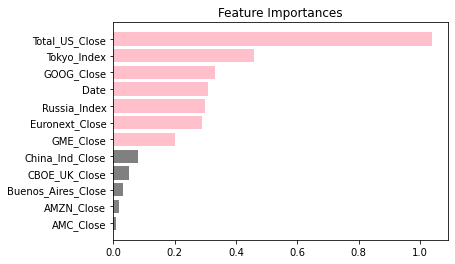

In [133]:
colorlist_=[]
for entry in range(12):
    if entry >4:
        colorlist_.append('pink')
    else:
        colorlist_.append('gray')

fulllist.sort_values('points',ascending=True, inplace=True)
plt.barh(fulllist['market'],fulllist['points'],color=colorlist_)
plt.title('Feature Importances');

In [134]:
markets.corr()

,Date,Bitcoin_Close,GOOG_Close,AMZN_Close,GME_Close,AMC_Close,Total_US_Close,China_Ind_Close,Euronext_Close,CBOE_UK_Close,Russia_Index,Tokyo_Index,Buenos_Aires_Close
Date,1.000000,-0.756593,-0.887219,-0.874787,-0.686960,-0.238799,-0.890347,0.629865,-0.646911,0.327341,-0.747547,-0.768946,-0.844992
Bitcoin_Close,-0.756593,1.000000,0.908258,0.771144,0.877492,0.495688,0.919629,-0.225641,0.824601,-0.018148,0.796819,0.908152,0.781088
GOOG_Close,-0.887219,0.908258,1.000000,0.845101,0.873187,0.563888,0.982454,-0.442670,0.862158,-0.057645,0.807569,0.896203,0.902792
AMZN_Close,-0.874787,0.771144,0.845101,1.000000,0.663506,0.300941,0.883504,-0.386722,0.585844,-0.439512,0.842131,0.793784,0.732136
GME_Close,-0.686960,0.877492,0.873187,0.663506,1.000000,0.706658,0.851311,-0.222966,0.800996,0.065825,0.694759,0.840974,0.738435
AMC_Close,-0.238799,0.495688,0.563888,0.300941,0.706658,1.000000,0.509110,0.009780,0.636189,0.341377,0.469099,0.484121,0.452401
Total_US_Close,-0.890347,0.919629,0.982454,0.883504,0.851311,0.509110,1.000000,-0.374480,0.874924,-0.060278,0.853026,0.934501,0.882224
China_Ind_Close,0.629865,-0.225641,-0.442670,-0.386722,-0.222966,0.009780,-0.374480,1.000000,-0.148677,0.361752,-0.153897,-0.166342,-0.538664
Euronext_Close,-0.646911,0.824601,0.862158,0.585844,0.800996,0.636189,0.874924,-0.148677,1.000000,0.402067,0.720926,0.857777,0.775658
CBOE_UK_Close,0.327341,-0.018148,-0.057645,-0.439512,0.065825,0.341377,-0.060278,0.361752,0.402067,1.000000,-0.198645,0.036655,-0.011464


## Because of the large amount of high correlations between Bitcoin and traditional stocks, many of the features end up being important across the many models we've constructed.
## What matters is, Total_US index ends up being the strongest feature in the most strong models. Even in models that don't assign it high importance, our models score close to 0.99 R<sup>2</sup>.

## Basically, what this tells us is that Bitcoin is far more correlated to the traditional stock market than what some would have you believe. It is more volatile, but ultimately, it can be predicted with just a few stocks and indexes.